In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('HRDataset.csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


<Axes: >

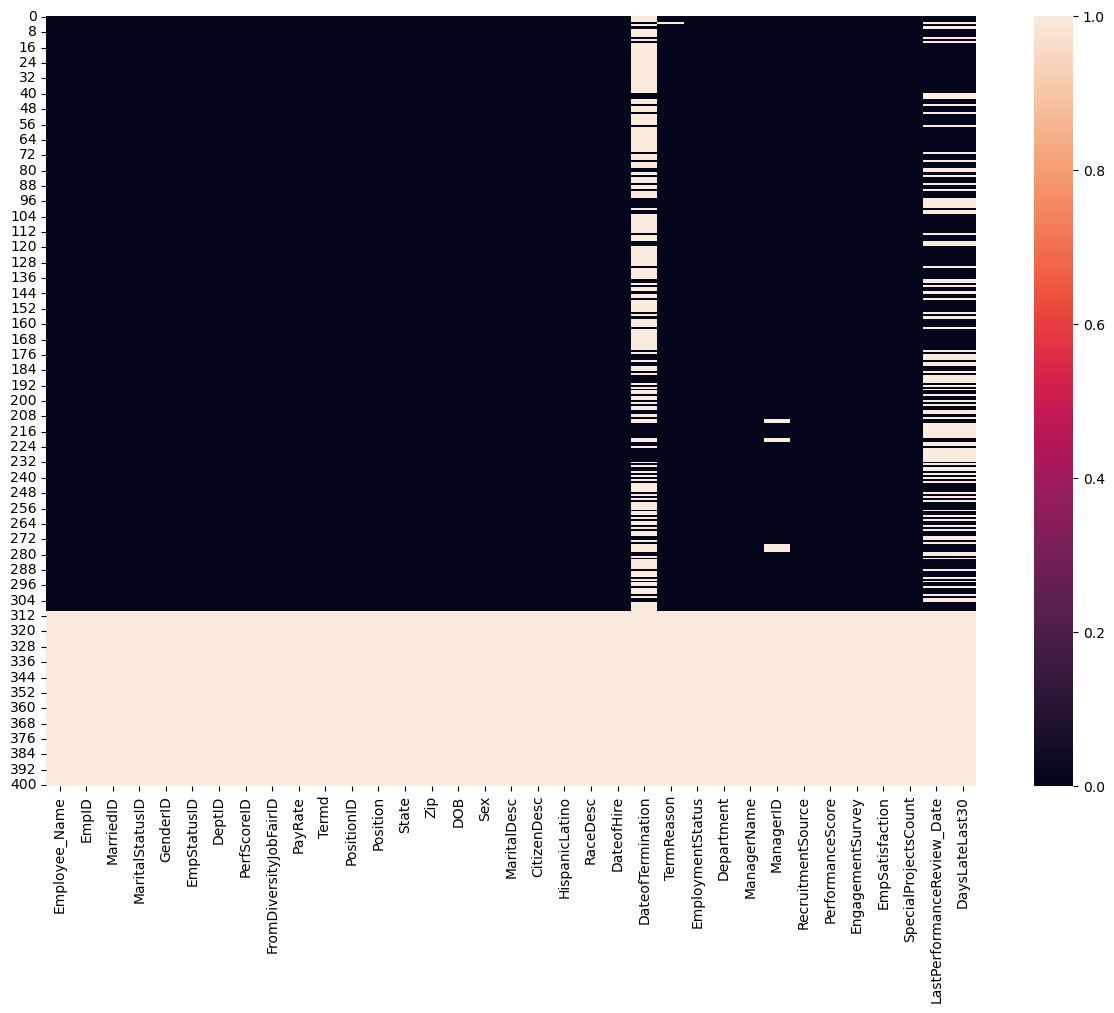

In [7]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.isnull())

In [11]:
df.drop(['LastPerformanceReview_Date','DaysLateLast30'], axis=1, inplace=True)
df.dropna(thresh=2, inplace=True)

<Axes: >

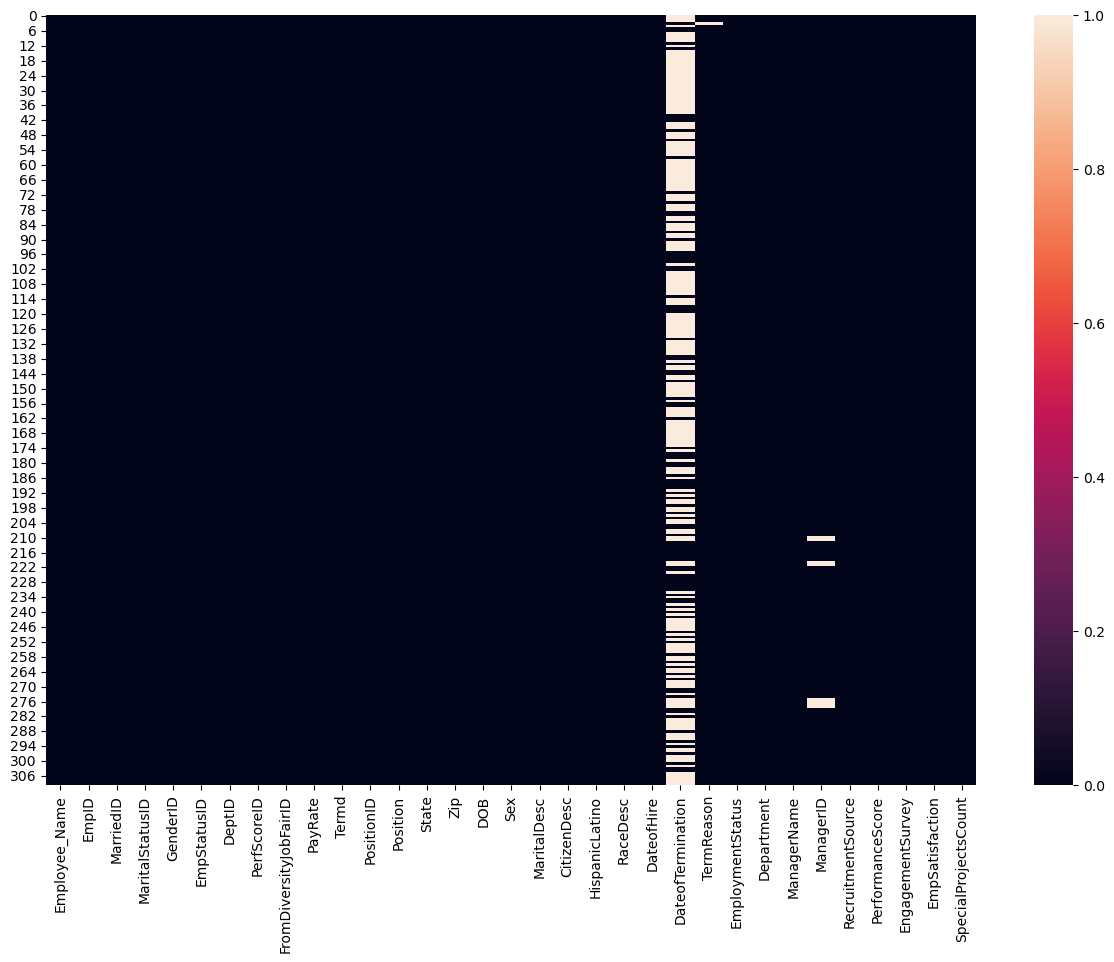

In [13]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.isnull())

In [15]:
df[['DateofTermination','DOB','DateofHire']].dtypes

DateofTermination    object
DOB                  object
DateofHire           object
dtype: object

In [17]:
df[['DateofTermination','DOB','DateofHire']].head(7)

,DateofTermination,DOB,DateofHire
0,NaN,11/24/87,10/27/2008
1,NaN,04/26/84,1/6/2014
2,NaN,09/01/86,9/29/2014
3,04/15/15,09/16/85,2/16/2015
4,NaN,05/19/88,5/1/2015
5,09/25/13,06/14/87,9/26/2011
6,08/02/14,06/01/64,8/15/2011


In [19]:
df['DOB'] = pd.to_datetime(df['DOB'],format='%m/%d/%y')
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'],format='%m/%d/%y')
df['DateofHire'] = pd.to_datetime(df['DateofHire'],format='%m/%d/%Y')

In [21]:
df[['DateofTermination','DOB','DateofHire']].head(7)

,DateofTermination,DOB,DateofHire
0,NaT,1987-11-24,2008-10-27
1,NaT,1984-04-26,2014-01-06
2,NaT,1986-09-01,2014-09-29
3,2015-04-15,1985-09-16,2015-02-16
4,NaT,1988-05-19,2015-05-01
5,2013-09-25,1987-06-14,2011-09-26
6,2014-08-02,2064-06-01,2011-08-15


In [23]:
import datetime as dt

def del_future_date(row):
    if row['DOB'] > dt.datetime(2019,9,27):
        return (row['DOB'] - np.timedelta64(100,'Y')).strftime('%Y-%m-%d')
    else:
        return row['DOB'].strftime('%Y-%m-%d')

In [25]:
df['DOB'] = df.apply(lambda row: del_future_date(row), axis=1)
df[['DateofTermination','DOB','DateofHire']].head(7)

,DateofTermination,DOB,DateofHire
0,NaT,1987-11-24,2008-10-27
1,NaT,1984-04-26,2014-01-06
2,NaT,1986-09-01,2014-09-29
3,2015-04-15,1985-09-16,2015-02-16
4,NaT,1988-05-19,2015-05-01
5,2013-09-25,1987-06-14,2011-09-26
6,2014-08-02,1964-06-01,2011-08-15


In [27]:
df[['DateofTermination','DOB','DateofHire']].dtypes

DateofTermination    datetime64[ns]
DOB                          object
DateofHire           datetime64[ns]
dtype: object

In [29]:
df['DOB'] = pd.to_datetime(df['DOB'],format='%Y-%m-%d')

In [31]:
df[['DateofTermination','DOB','DateofHire']].dtypes

DateofTermination    datetime64[ns]
DOB                  datetime64[ns]
DateofHire           datetime64[ns]
dtype: object

In [33]:
sns.set_style('dark')

In [35]:
def count_seniority(row):

    if pd.isnull(row['DateofTermination']):
        end_date = dt.datetime(2019,9,27)
    else:
        end_date = row['DateofTermination']

    return (end_date - row['DateofHire'])/np.timedelta64(1,'Y')

In [39]:
df['Seniority'] = df.apply(lambda row: count_seniority(row), axis=1)
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,Seniority
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Active,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,10.916035
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Active,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,5.722226
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Active,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,4.993942
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Terminated for Cause,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,0.158799
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Active,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,4.408030


## 1. 

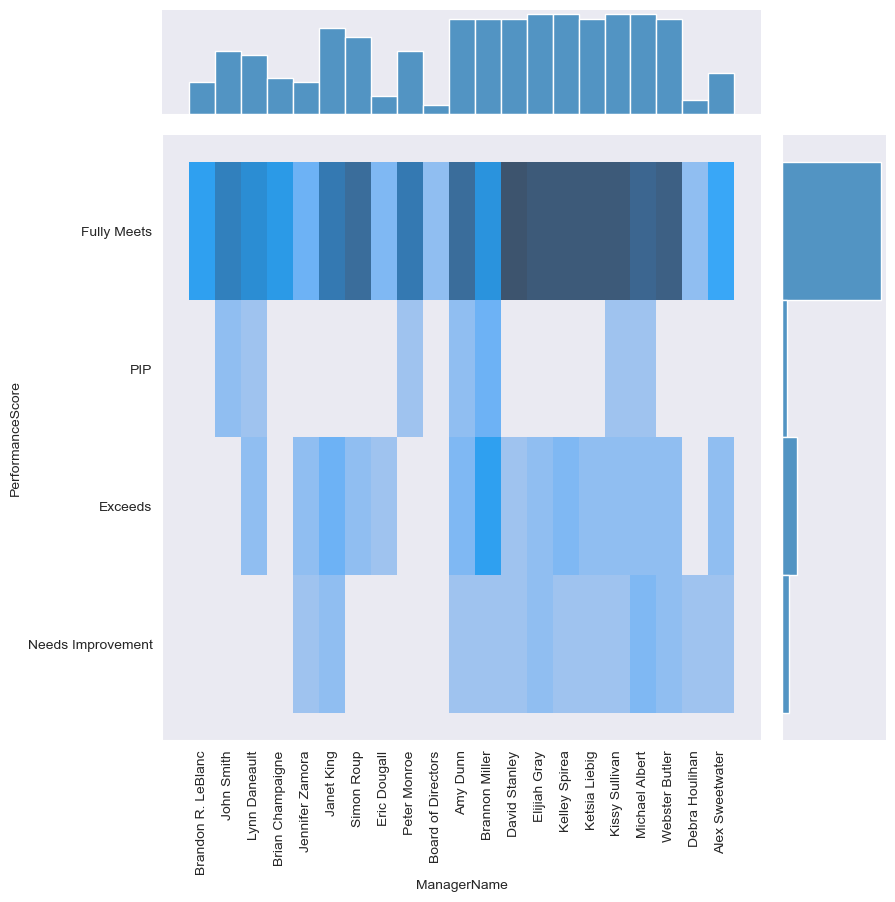

In [42]:
plt1 = sns.jointplot(x='ManagerName', y='PerformanceScore', data=df, height=8, kind='hist')
plt.setp(plt1.ax_joint.get_xticklabels(), rotation=90)
plt.show()

Z reguły nie ma zależności pomiędzy tym kto jest bezpośrednim przełożonym danego pracownika, a oceną wydajności pracy. Menagerowie z największą liczbą podwładnych mają również najwięcej w pełni zaangażowanych pracowników. Wyjątkiem jest Brannon Miller, który posiada większe grupy pracowników zaangażowanych mniej.

## 2. 

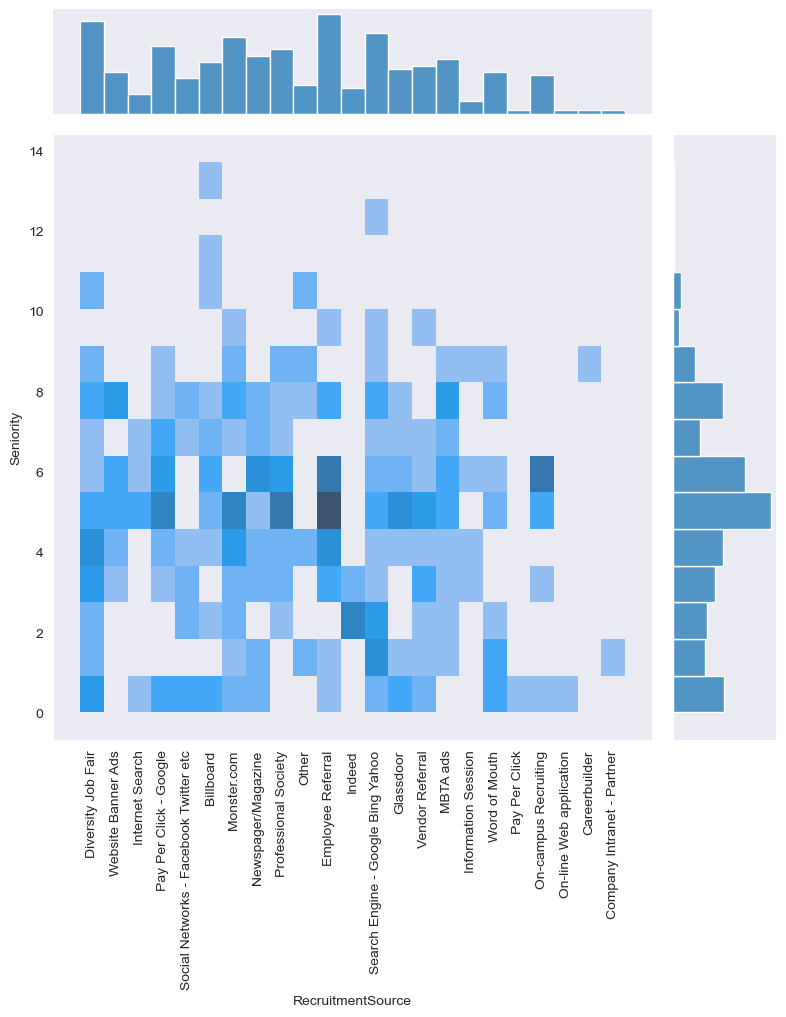

In [46]:
plt2 = sns.jointplot(x='RecruitmentSource', y='Seniority', data=df, height=8, kind='hist')
plt.setp(plt2.ax_joint.get_xticklabels(), rotation=90)
plt.show()

Na wykresie można zauważyć, że istnieje grupa pracowników z długim stażem, którzy o pracy dowiedzieli się z bilbordu. Moim zdaniem jednak jest to dość przestarzała forma umieszczania ogłoszenia o pracę i w firmie ostała się jakaś grupa starszych pracowników zatrudnionych tą drogą wiele lat temu. Pod względem długości stażu pracowników wyróżniają się takie żródła jak przeglądarki internetowe oraz strona Monster.com.

## 3.

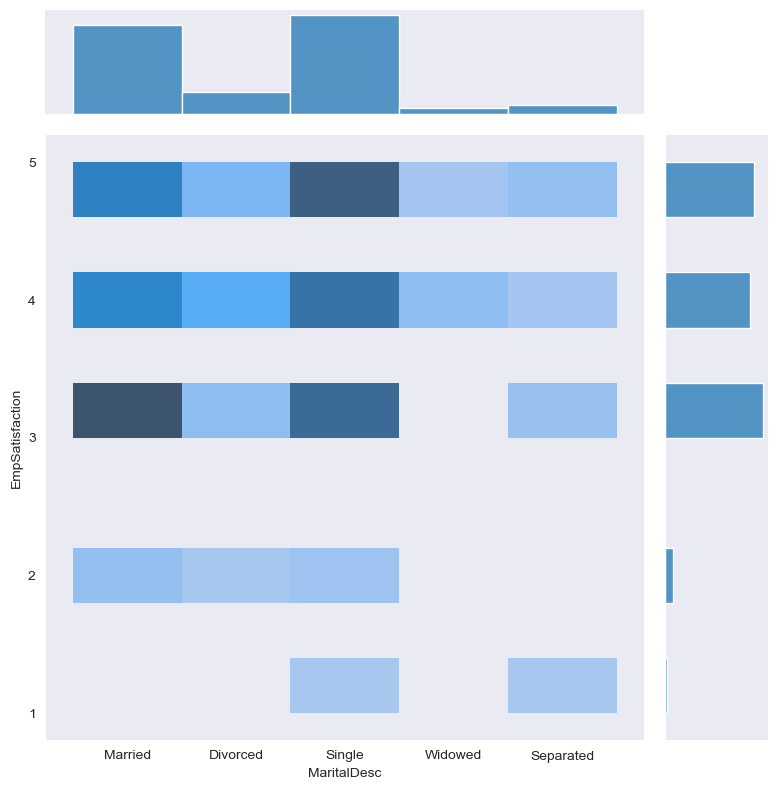

In [50]:
plt3 = sns.jointplot(x='MaritalDesc', y='EmpSatisfaction', data=df, height=8, kind='hist')
plt3.ax_joint.yaxis.set_major_locator(plt.MultipleLocator(1))

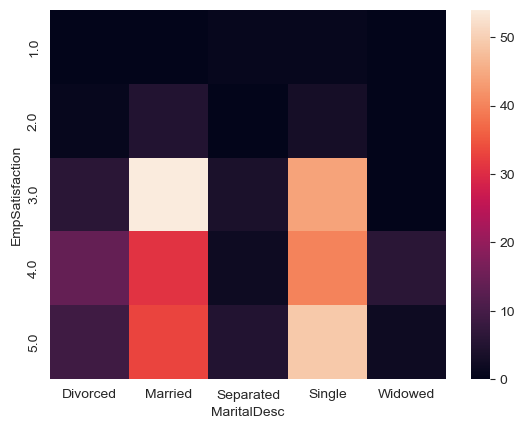

In [51]:
sns.heatmap(df.pivot_table(index='EmpSatisfaction', columns='MaritalDesc', values='EmpID',aggfunc='count').fillna(0))
plt.show()

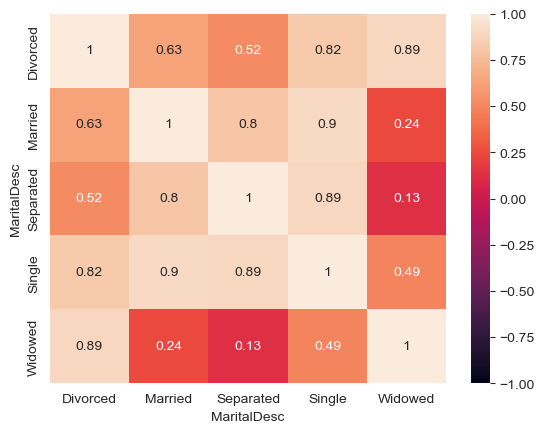

In [54]:
sns.heatmap(df.pivot_table(index='EmpSatisfaction', columns='MaritalDesc', values='EmpID',aggfunc='count').fillna(0).corr(), vmin=-1, vmax=1, annot=True)
plt.show()

Według mnie nie ma korelacji między stanem cywilnym a zadowoleniem z pracy. Po prostu najliczniejsze grupy mają największą liczbę zadowolonych osób.
Nie wiem niestety jak użyć funkcji corr() żeby na jednej osi mieć stany cywilne, a na drugiej poziom zadowolenia pracownika.

## 4.

In [58]:
def count_age(row):
    return (dt.datetime(2019,9,27) - row['DOB'])/np.timedelta64(1,'Y')

In [60]:
df['Age'] = df.apply(lambda row: count_age(row), axis=1)
df.head(7)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,Seniority,Age
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,10.916035,31.841858
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,5.722226,35.420303
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,4.993942,33.071179
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,0.158799,34.029446
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,4.408030,31.357249
5,"Smith, Leigh Ann",7.110077e+08,1.0,1.0,0.0,5.0,1.0,3.0,1.0,20.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,3.80,4.0,4.0,1.998672,32.288137
6,"Bunbury, Jessica",1.504073e+09,1.0,1.0,0.0,5.0,6.0,3.0,0.0,55.00,...,Sales,John Smith,17.0,Social Networks - Facebook Twitter etc,Fully Meets,3.14,5.0,0.0,2.965153,55.322149


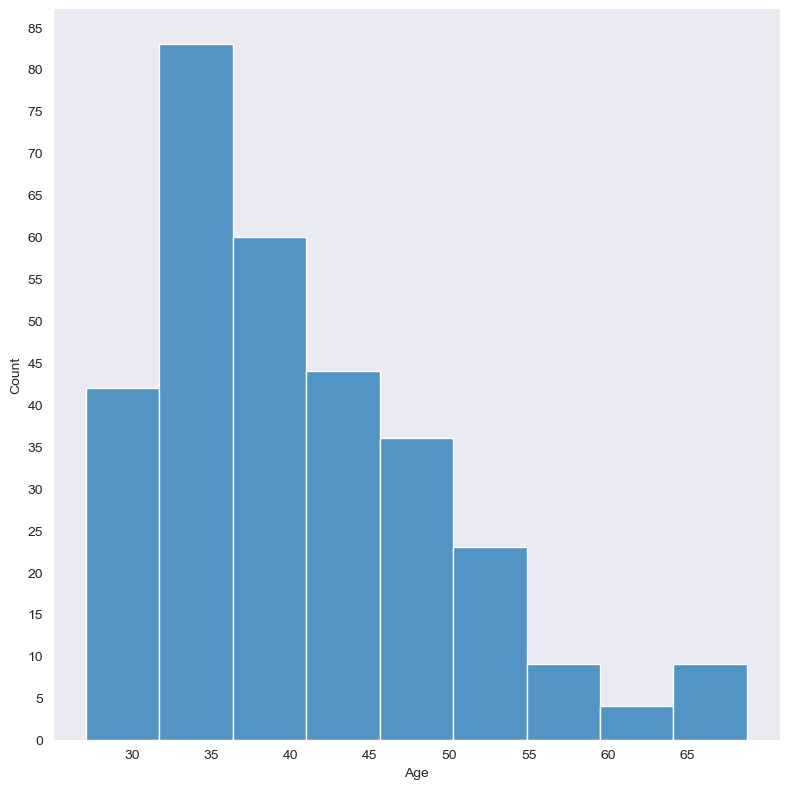

In [124]:
plt4 = sns.displot(df['Age'], height=8, bins=9)
plt4.ax.xaxis.set_major_locator(plt.FixedLocator(np.arange(20, 70, 5)))
plt4.ax.yaxis.set_major_locator(plt.FixedLocator(np.arange(0, 90, 5)))

Najliczniejszą grupę pracowników stanowią osoby pomiędzy 30 a 40 rokiem życia. 

## 5.

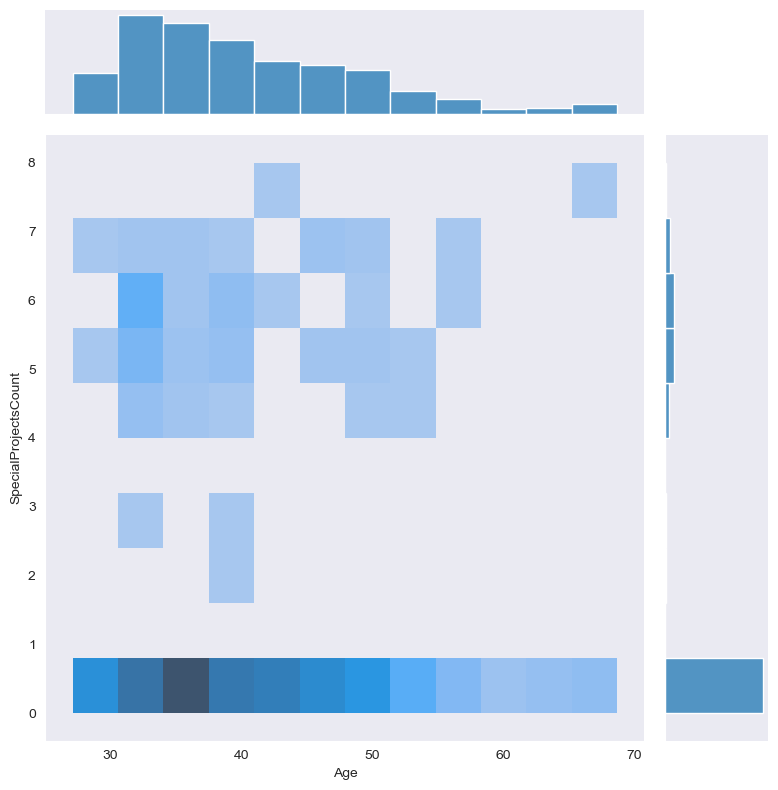

In [128]:
sns.jointplot(x='Age', y='SpecialProjectsCount', data=df, height=8, kind='hist')

Największą liczbę specjalnych projektów robią osoby pomiędzy 30 a 40 rokiem życia, ale one stanowią również najliczniejszą grupę pracowników. Natomias pracownicy po 60 roku życia rzadko podejmują się udziału w specjalnych projektach.